In [1]:
import numpy as np
import pandas as pd

# remember, to quickly see pandas content you can type pd.<tab 

# and to see pandas documentation hit pd?

In [2]:
pd?

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
data[1]

0.5

In [7]:
data[0]

0.25

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [9]:
data[1::2]

1    0.5
3    1.0
dtype: float64

# main difference with Pandas Series and NumPy array: Numpy array has an implicitly defined integer index, whereas, Pandas Series have an explicitly defined index associated with the values

# for example, the explicit index can be anything, including not an integer

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index =['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [11]:
data['b']

0.5

# we may also use nonsequential or non- continuous indices

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index=[2, 5, 4, 12])
data

2     0.25
5     0.50
4     0.75
12    1.00
dtype: float64

In [14]:
data[5]

0.5

In [17]:
#data[3]=> won't work since there's no index for 3

## in a sense, we can think of a Pandas Series being capable of having specialization of a Python dictionary.

In [19]:
population_dict = {'California': 38500000,
                  'Texas': 26000000,
                  'New York': 20000000,
                  'Florida': 19000000,
                  'Illinois': 12000000}
population = pd.Series(population_dict)
population

California    38500000
Texas         26000000
New York      20000000
Florida       19000000
Illinois      12000000
dtype: int64

# by default, a Series will be created where the index is drawn

In [20]:
population['California']

38500000

## unlike a dictionary, the Series supports array-styled operations, including slicing

In [22]:
population['California':'New York']

California    38500000
Texas         26000000
New York      20000000
dtype: int64

In [25]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

#### ifit's a list or NumPy array, the index defaults to an integer sequence

In [27]:
pd.Series(5, index=[100, 200, 300]) #scalar => repeated to fill the specified index

100    5
200    5
300    5
dtype: int64

In [29]:
pd.Series({2:'a', 1:'b', 3:'c'}) #data can be a dictionary

2    a
1    b
3    c
dtype: object

In [30]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]) #the index can be explicitly set, if wished

3    c
2    a
dtype: object

# Next, let's investigate the DataFrame

# if Series are thought of as one-dimensional arrays with flexible indices and row, a DataFrame can be thought of as a two-dimensional array with both flexible row indices and flexible column names

In [31]:
area_dict = {'California': 424000, 'Texas': 700000, 'New York': 142000, 'Florida': 170000, 'Illinois': 150000}
area = pd.Series(area_dict)
area

California    424000
Texas         700000
New York      142000
Florida       170000
Illinois      150000
dtype: int64

In [33]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38500000,424000
Texas,26000000,700000
New York,20000000,142000
Florida,19000000,170000
Illinois,12000000,150000


In [36]:
states.index #index labels

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [37]:
states.columns #index holding column labels

Index(['population', 'area'], dtype='object')

### allas, the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both rows and columns have generalized index for accessing the data

# it's also important to think of the DataFrame as a specialization of a dictionary. Where the dictionary maps the key to a value, the DataFrame maps a column name to a Series of column data

In [38]:
states['area']

California    424000
Texas         700000
New York      142000
Florida       170000
Illinois      150000
Name: area, dtype: int64

# *** Think of DataFrames as Generalized Dictionaries, NOT Generalized Arrays ***

## thinking more about this, it's because if we take the 0th column, there's still data in there. We think about the column titles as indices.

In [39]:
pd.DataFrame(population, columns=['population'])

,population
California,38500000
Texas,26000000
New York,20000000
Florida,19000000
Illinois,12000000


In [44]:
data = [{'a': i, 'b': 2 * i, 'c' : 5 * i, 'd' : i ** i}
       for i in range(4)]
pd.DataFrame(data) #can form a list of dictionaries

,a,b,c,d
0,0,0,0,1
1,1,2,5,1
2,2,4,10,4
3,3,6,15,27


## if there are missing values, Pandas will fill them in with NaN

In [45]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b' : 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [46]:
pd.DataFrame({'population': population, 
              'area': area})

,population,area
California,38500000,424000
Texas,26000000,700000
New York,20000000,142000
Florida,19000000,170000
Illinois,12000000,150000


In [47]:
pd.DataFrame(np.random.rand(3, 2),
            columns=['foo', 'bar'],
            index=['a', 'b','c'])

,foo,bar
a,0.183850,0.568306
b,0.897481,0.993369
c,0.107681,0.199097


In [49]:
pd.DataFrame(np.random.rand(3, 2),
            columns=['foo', 'bar'],) #if index is omitted integers will be used

,foo,bar
0,0.569337,0.967056
1,0.810265,0.249412
2,0.374962,0.260592


In [52]:
A = np.zeros(3, dtype=[('A', 'i8'),('B', 'f8')])
A #integer, and f8

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [51]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [53]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [54]:
ind[1]

3

In [55]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [56]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [58]:
#ind[1] = 0 can't do this operation, as indices are immutable

In [59]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [62]:
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [63]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [64]:
indA ^ indB # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

In [65]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index =['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [66]:
data['b']

0.5

In [67]:
'a' in data

True

In [68]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [69]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [71]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [72]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [73]:
#slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [74]:
#masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [75]:
#fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [76]:
data = pd.Series(['a', 'b', 'c'], 
                index = [1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [77]:
# explicit index when indexing
data[1]

'a'

In [78]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [79]:
data

1    a
3    b
5    c
dtype: object

# can be slightly confusing based on how the indexing is setup. We need to instinctively be careful.

### using .loc allows indexing and slicing that always references the explicit index

In [80]:
data.loc[1]

'a'

In [81]:
data.loc[1:3]

1    a
3    b
dtype: object

### then using .iloc is for indexing and slicing that references the implicit Python-style index 

In [82]:
data.iloc[0]

'a'

In [83]:
data.iloc[1]

'b'

In [85]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [92]:
data.iloc[0:3]

1    a
3    b
5    c
dtype: object

In [93]:
area = pd.Series({'California': 424000,
                 'Texas': 700000,
                  'New York': 140000,
                  'Florida': 170000,
                 'Illinois': 150000})
pop = pd.Series({'California': 38000000,
                'Texas': 26500000,
                'New York': 19650000,
                'Florida': 19500000,
                'Illinois': 1300000})
data = pd.DataFrame({'area': area, 'pop':pop})
data

,area,pop
California,424000,38000000
Texas,700000,26500000
New York,140000,19650000
Florida,170000,19500000
Illinois,150000,1300000


In [94]:
data['area']

California    424000
Texas         700000
New York      140000
Florida       170000
Illinois      150000
Name: area, dtype: int64

In [95]:
data.area

California    424000
Texas         700000
New York      140000
Florida       170000
Illinois      150000
Name: area, dtype: int64

In [96]:
data.area is data['area']

True

In [98]:
data.pop is data['pop'] #for example, DataFrame has a pop() method, so data.pop will point to this rather than the 
# "pop" column and alas, raises a False

False

In [100]:
data['density'] = data['pop'] / data['area'] # it's good practice to do our columns like this
data

,area,pop,density
California,424000,38000000,89.622642
Texas,700000,26500000,37.857143
New York,140000,19650000,140.357143
Florida,170000,19500000,114.705882
Illinois,150000,1300000,8.666667


In [101]:
data.values

array([[4.24000000e+05, 3.80000000e+07, 8.96226415e+01],
       [7.00000000e+05, 2.65000000e+07, 3.78571429e+01],
       [1.40000000e+05, 1.96500000e+07, 1.40357143e+02],
       [1.70000000e+05, 1.95000000e+07, 1.14705882e+02],
       [1.50000000e+05, 1.30000000e+06, 8.66666667e+00]])

In [102]:
data.T #transpose the DataFrame

,California,Texas,New York,Florida,Illinois
area,4.240000e+05,7.000000e+05,1.400000e+05,1.700000e+05,1.500000e+05
pop,3.800000e+07,2.650000e+07,1.965000e+07,1.950000e+07,1.300000e+06
density,8.962264e+01,3.785714e+01,1.403571e+02,1.147059e+02,8.666667e+00


In [103]:
data.values[0]

array([4.24000000e+05, 3.80000000e+07, 8.96226415e+01])

In [104]:
data['area']

California    424000
Texas         700000
New York      140000
Florida       170000
Illinois      150000
Name: area, dtype: int64

In [111]:
data.iloc[:3, :2]

,area,pop
California,424000,38000000
Texas,700000,26500000
New York,140000,19650000


In [110]:
data.loc[:'New York',:'pop']

,area,pop
California,424000,38000000
Texas,700000,26500000
New York,140000,19650000


In [112]:
data.ix[:3, :'pop']

/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,424000,38000000
Texas,700000,26500000
New York,140000,19650000


In [116]:
data.loc[data.density > 85, ['pop', 'density']]

,pop,density
California,38000000,89.622642
New York,19650000,140.357143
Florida,19500000,114.705882


In [118]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,424000,38000000,90.000000
Texas,700000,26500000,37.857143
New York,140000,19650000,140.357143
Florida,170000,19500000,114.705882
Illinois,150000,1300000,8.666667


In [120]:
data.iloc[4, 2] = 10
data

,area,pop,density
California,424000,38000000,90.000000
Texas,700000,26500000,37.857143
New York,140000,19650000,140.357143
Florida,170000,19500000,114.705882
Illinois,150000,1300000,10.000000


In [121]:
data['area/density'] = data['area'] / data['density'] # it's good practice to do our columns like this
data

,area,pop,density,area/density
California,424000,38000000,90.000000,4711.111111
Texas,700000,26500000,37.857143,18490.566038
New York,140000,19650000,140.357143,997.455471
Florida,170000,19500000,114.705882,1482.051282
Illinois,150000,1300000,10.000000,15000.000000


In [129]:
data.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [130]:
data.columns

Index(['area', 'pop', 'density', 'area/density'], dtype='object')

In [137]:
data.columns = ['area', 'pop', 'populationdensity', 'area/density']
data

,area,pop,populationdensity,area/density
California,424000,38000000,90.000000,4711.111111
Texas,700000,26500000,37.857143,18490.566038
New York,140000,19650000,140.357143,997.455471
Florida,170000,19500000,114.705882,1482.051282
Illinois,150000,1300000,10.000000,15000.000000


In [138]:
data['Florida':'Illinois']

,area,pop,populationdensity,area/density
Florida,170000,19500000,114.705882,1482.051282
Illinois,150000,1300000,10.000000,15000.000000


In [139]:
data[1:3]

,area,pop,populationdensity,area/density
Texas,700000,26500000,37.857143,18490.566038
New York,140000,19650000,140.357143,997.455471


In [140]:
data[data.populationdensity > 100]

,area,pop,populationdensity,area/density
New York,140000,19650000,140.357143,997.455471
Florida,170000,19500000,114.705882,1482.051282


In [141]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [142]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [144]:
np.exp(ser) # use np ufuncs, however, maintain Pandas DataFrames

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [145]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [147]:
area = pd.Series({'Alaska': 1723337, 'Texas': 700000, 'California': 424000}, name = 'area')
population = pd.Series({'California': 38330000, 'Texas': 26500000, 'New York': 19650000}, name = 'population')
#imagine there are two different data sources with mismatched columns and values

In [148]:
population / area

Alaska              NaN
California    90.400943
New York            NaN
Texas         37.857143
dtype: float64

In [149]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [150]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

# filling in NaN

In [151]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### index alignment

In [159]:
A = pd.DataFrame(rng.randint(0, 20, (2,2)),
                columns=list('AB'))
A

,A,B
0,3,1
1,5,9


In [160]:
B = pd.DataFrame(rng.randint(0, 10, (3,3)),
                columns=list('BAC'))
B

,B,A,C
0,3,5,1
1,9,1,9
2,3,7,6


In [161]:
A + B

,A,B,C
0,8.0,4.0,NaN
1,6.0,18.0,NaN
2,NaN,NaN,NaN


In [162]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,8.0,4.0,5.5
1,6.0,18.0,13.5
2,11.5,7.5,10.5


In [166]:
A = rng.randint(10, size=(3,4))
A

array([[9, 6, 9, 8],
       [6, 8, 7, 1],
       [0, 6, 6, 7]])

In [167]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-3,  2, -2, -7],
       [-9,  0, -3, -1]])

In [168]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-3,2,-2,-7
2,-9,0,-3,-1


# if you want to make operations columnwise, use axes, appropriately

In [169]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,3,0,3,2
1,-2,0,-1,-7
2,-6,0,0,1


# Handling Missing Data

In [170]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [172]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print() #object has much overhead and is significantly slower

dtype = object
58.6 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
945 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [175]:
#vals1.sum() running sum over an array with objects results in an error
#addition between an integer and an object (None) is undefined

# Handling NaN

In [177]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

#### NaN is a bit like a virus. It will affect any other object it touches

In [178]:
1 + np.nan

nan

In [179]:
0 * np.nan

nan

In [180]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

### however, there are some operations that will ignore these missing values

In [181]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

#### Pandas is built to handle None and NaN very similarly

In [182]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [183]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [185]:
x[0] = None
x #automatically changes to floating point array

0    NaN
1    1.0
dtype: float64

## detecting nulls

In [186]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [187]:
data[data.notnull()]

0        1
2    hello
dtype: object

# dropping null values

In [189]:
data.dropna()

0        1
2    hello
dtype: object

In [190]:
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


## when we are working with a DataFrame, we can only drop fully rows or columns, not individual elements. Therefore, we are only able to drop full rows or full columns

### by default, df.dropna() will droo all rows in which any null value is present

In [191]:
df.dropna()

,0,1,2
1,2.0,3.0,5


## or, we may utilize column's to drop only relevant columns

In [192]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


## we can also use how='all', which will only drop rows/columns that are all null values

In [194]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [195]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


## the thresh parameter also allows you to specify the minimum nuimber of non-null values for the row/column to be kept

In [196]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [197]:
df.dropna(axis='columns', thresh=2)

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


# Filling null values

In [199]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

#### it's very easy to fill NaN entiries with a single value, such as zero:

In [200]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [201]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [202]:
#back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [203]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


## DataFrames are similar, however, we need to specify an axis on which the fills take place

In [205]:
df.fillna(method='ffill', axis=1) #if a previous value is not available, the NaN value remains

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Multiindexing : heirarchical indexing

In [206]:
index = [('California', 2000), ('California', 2010),
        ('New York', 2000), ('New York', 2010),
        ('Texas', 2000), ('Texas', 2010)]
populations = [33870000, 37250000,
              18900000, 19400000,
              20869000, 25150000]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33870000
(California, 2010)    37250000
(New York, 2000)      18900000
(New York, 2010)      19400000
(Texas, 2000)         20869000
(Texas, 2010)         25150000
dtype: int64

In [207]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37250000
(New York, 2000)      18900000
(New York, 2010)      19400000
(Texas, 2000)         20869000
dtype: int64

### however, if we need to select all values from 2010, things get messy and slow

In [209]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37250000
(New York, 2010)      19400000
(Texas, 2010)         25150000
dtype: int64

### however, we have better options with Pandas MultiIndex

In [212]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [214]:
pop = pop.reindex(index)
pop #cleanly multiindexed

California  2000    33870000
            2010    37250000
New York    2000    18900000
            2010    19400000
Texas       2000    20869000
            2010    25150000
dtype: int64

In [215]:
pop[:, 2010]

California    37250000
New York      19400000
Texas         25150000
dtype: int64

In [216]:
pop[:, 2010]

California    37250000
New York      19400000
Texas         25150000
dtype: int64

In [217]:
pop['California']

2000    33870000
2010    37250000
dtype: int64

## the unstack() method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame:

In [218]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33870000,37250000
New York,18900000,19400000
Texas,20869000,25150000


In [220]:
pop_df.stack() # we have a convenient reverse option

California  2000    33870000
            2010    37250000
New York    2000    18900000
            2010    19400000
Texas       2000    20869000
            2010    25150000
dtype: int64

# MultiIndexing morale: conveniently have three, four, or more dimensions in a single Series or DataFrame

In [221]:
pop_df = pd.DataFrame({'total': pop,
                      'under18': [9267000, 9285000, 
                                 4686000, 4318000, 
                                 5900000, 6879000]})
pop_df

total  under18
California 2000  33870000  9267000
           2010  37250000  9285000
New York   2000  18900000  4686000
           2010  19400000  4318000
Texas      2000  20869000  5900000
           2010  25150000  6879000

In [223]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack() #fraction of people under 18 in each state, during each year

,2000,2010
California,0.273605,0.249262
New York,0.247937,0.222577
Texas,0.282716,0.273519


## methods of Multiindex Creation

In [226]:
df = pd.DataFrame(np.random.rand(4,2), 
                 index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                 columns=['data1', 'data2'])
df

data1     data2
a 1  0.776308  0.886261
  2  0.607998  0.720278
b 1  0.284713  0.850545
  2  0.989590  0.035421

In [227]:
data = {('California', 2000): 33840000, ('California', 2010): 37500000,
        ('New York', 2000): 18975000, ('New York', 2010): 19400000,
        ('Texas', 2000): 20850000, ('Texas', 2010): 25100000}
pd.Series(data)
        

California  2000    33840000
            2010    37500000
New York    2000    18975000
            2010    19400000
Texas       2000    20850000
            2010    25100000
dtype: int64

In [229]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]) #from arrays

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [231]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)]) #from tuples

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [232]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]]) # from Cartesian products of single indices

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [235]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
             codes=[[0,0,1,1], [0,1,0,1]]) # index argument

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

## MultiIndex level names

In [237]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33870000
            2010    37250000
New York    2000    18900000
            2010    19400000
Texas       2000    20869000
            2010    25150000
dtype: int64

In [241]:
# heirarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                  names=['year', 'visit'])
columns=pd.MultiIndex.from_product([['Bob', 'Guido','Sue'], ['HR', 'Temp']],
                                  names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4,6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data    #four dimensional data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  37.4  44.0  35.5  20.0  35.1
     2      51.0  36.8  35.0  36.6  57.0  36.9
2014 1      30.0  36.3  25.0  36.7  40.0  35.4
     2      36.0  36.6  15.0  36.4  35.0  38.1

In [242]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      44.0  35.5
     2      35.0  36.6
2014 1      25.0  36.7
     2      15.0  36.4

In [243]:
pop

state       year
California  2000    33870000
            2010    37250000
New York    2000    18900000
            2010    19400000
Texas       2000    20869000
            2010    25150000
dtype: int64

In [244]:
pop['California', 2000]

33870000

In [245]:
pop['California']

year
2000    33870000
2010    37250000
dtype: int64

In [246]:
pop.loc['California':'New York']

state       year
California  2000    33870000
            2010    37250000
New York    2000    18900000
            2010    19400000
dtype: int64

In [247]:
pop[:, 2000]

state
California    33870000
New York      18900000
Texas         20869000
dtype: int64

In [250]:
pop[pop > 22000000]

state       year
California  2000    33870000
            2010    37250000
Texas       2010    25150000
dtype: int64

In [253]:
pop[['California', 'Texas']]

state       year
California  2000    33870000
            2010    37250000
Texas       2000    20869000
            2010    25150000
dtype: int64

In [254]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  37.4  44.0  35.5  20.0  35.1
     2      51.0  36.8  35.0  36.6  57.0  36.9
2014 1      30.0  36.3  25.0  36.7  40.0  35.4
     2      36.0  36.6  15.0  36.4  35.0  38.1

In [255]:
health_data['Guido', 'HR']

year  visit
2013  1        44.0
      2        35.0
2014  1        25.0
      2        15.0
Name: (Guido, HR), dtype: float64

In [258]:
health_data.iloc[:4,:2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      39.0  37.4
     2      51.0  36.8
2014 1      30.0  36.3
     2      36.0  36.6

In [259]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        39.0
      2        51.0
2014  1        30.0
      2        36.0
Name: (Bob, HR), dtype: float64

In [261]:
#health_data.iloc[(:, 1), (:, 'HR')] creating a tuple will result in an error

### instead, can use slice() or IndexSlice

In [262]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,39.0,44.0,20.0
2014,1,30.0,25.0,40.0


In [263]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names =['char', 'int']
data

char  int
a     1      0.403262
      2      0.676490
c     1      0.164400
      2      0.140594
b     1      0.517947
      2      0.731077
dtype: float64

### taking a partial slice of this array will result in an error

In [265]:
try:
    data['a': 'b']
except KeyError as e:
        print(type(e))
        print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [267]:
data = data.sort_index()
data #use sort.index() or sortlevel() to sort MultiIndex DataFrames

char  int
a     1      0.403262
      2      0.676490
b     1      0.517947
      2      0.731077
c     1      0.164400
      2      0.140594
dtype: float64

### with the index sorted in this way, partial slicing works, no problem

In [268]:
data['a':'b']

char  int
a     1      0.403262
      2      0.676490
b     1      0.517947
      2      0.731077
dtype: float64

# unstacking and stacking indices

In [269]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33870000,18900000,20869000
2010,37250000,19400000,25150000


In [270]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33870000,37250000
New York,18900000,19400000
Texas,20869000,25150000


In [271]:
pop.unstack().stack()

state       year
California  2000    33870000
            2010    37250000
New York    2000    18900000
            2010    19400000
Texas       2000    20869000
            2010    25150000
dtype: int64

In [272]:
pop

state       year
California  2000    33870000
            2010    37250000
New York    2000    18900000
            2010    19400000
Texas       2000    20869000
            2010    25150000
dtype: int64

In [273]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33870000
1,California,2010,37250000
2,New York,2000,18900000
3,New York,2010,19400000
4,Texas,2000,20869000
5,Texas,2010,25150000


In [274]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33870000
           2010    37250000
New York   2000    18900000
           2010    19400000
Texas      2000    20869000
           2010    25150000

In [275]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  37.4  44.0  35.5  20.0  35.1
     2      51.0  36.8  35.0  36.6  57.0  36.9
2014 1      30.0  36.3  25.0  36.7  40.0  35.4
     2      36.0  36.6  15.0  36.4  35.0  38.1

# for heirarchical data, a level parameter can be passed that controls which subset of data aggregate actions are computed on

### for example, averaging out values from both yearly visits

In [276]:
data_mean = health_data.mean(level = 'year')
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     45.0  37.10  39.5  36.05  38.5  36.00
2014     33.0  36.45  20.0  36.55  37.5  36.75

In [277]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,41.000000,36.383333
2014,30.166667,36.583333


# Combining Datasets: Concat and Append

In [279]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}
    return pd.DataFrame(data, ind)

#example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [280]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [281]:
x = [[1, 2],
    [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## use Simple Concatenation with Pandas pd.concat()

In [282]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [283]:
df1 = make_df('AB', [1, 2]) 
df2 = make_df('AB', [3, 4]) 
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [287]:
df3 = make_df('AB', [0, 1]) 
df4 = make_df('AB', [0, 1]) 
print(df3); print(df4); print(pd.concat([df3, df4], axis=1)) 

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A0  B0
1  A1  B1
    A   B   A   B
0  A0  B0  A0  B0
1  A1  B1  A1  B1


### duplicate indices

In [289]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index #make duplicate indices!
print(x); print(y); print(pd.concat([x, y], axis=0)) 

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


### note the result, with repeated indices. there are a few options

In [290]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


#### ignore the index

In [292]:
print(x); print(y); print(pd.concat([x, y], ignore_index=True)) #this reorders the indices

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


### adding multikey indexes

In [294]:
print(x); print(y); print(pd.concat([x, y], keys=['a', 'b'])) 

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
a 0  A0  B0
  1  A1  B1
b 0  A2  B2
  1  A3  B3


In [296]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


## by default, we merge outside columns, we can adjust this and only merge inside

In [297]:
print(df5); print(df6)
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [298]:
print(pd.concat([df5, df6], join='outer'))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [301]:
print(df5); print(df6)
print(pd.concat([df5, df6], join_axes =[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


# can simply append too

In [302]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


# Merges

## one - to - one

In [305]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                   'hire_date': [2004, 2008, 2012, 2014]})
print(df1) 
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [307]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [309]:
df4 = pd.DataFrame({'supervisor': ['Carly', 'Guido', 'Steve'],
                   'group': ['Accounting', 'Engineering', 'HR']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
  supervisor        group
0      Carly   Accounting
1      Guido  Engineering
2      Steve           HR
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [310]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                   'skills':['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})

In [311]:
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


# Specification of Merge key

### explicitly specify the name of the key column using the on key-word

In [312]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


### the left_on and right_on keywords, merging columns with different names

In [314]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
             'salary': [ 70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [319]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1) #we have a redundant axis we can end up dropping

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [320]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [321]:
print(df1a); print(df2a)
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


## use the index as the key for merging by specifying the left_index and right_index

In [323]:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [324]:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [325]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                   'food': ['fish', 'beans', 'bread']},
                  columns=['name','food'])
df7 = pd.DataFrame({'name':['Mary', 'Joseph'],
                   'drink':['wine','beer']},
                  columns=['name','drink'])
print(df6);print(df7);print(pd.merge(df6,df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


## only one name in common, Mary, therefore, there is only one common name for both matrices

In [326]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [327]:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


## overlapping column names

In [329]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'rank': [1,2,3,4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'rank': [3,1,4,2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


## because we would have conflicting columns, the merge function automatically appends a suffix _x or _y to make the output columns unique.

In [331]:
print(df8); print(df9); print(pd.merge(df8, df9, on="name", suffixes={"_R", "_L"}))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_R  rank_L
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [334]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [335]:
merged = pd.merge(pop, abbrevs, how='outer',
                 left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) #drop duplicates
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


## double check mismatches

In [336]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

## some null population infop

In [337]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


## PR is missing before 2000.

In [338]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

# our issues stem from PR and USA as a whole. we can quickly fill in these entries

In [341]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

# now, no more nulls in the state section

In [342]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


# check again for nulls

In [343]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

# nulls in area, let's see why

In [344]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [345]:
# missing the area of the United States. We can quickly sum this up, but it is not necessary information, so instead,
# we can drop this info

In [346]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


# want to quickly look at population density of 2010

In [348]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [349]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [350]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [352]:
density.tail() #least dense is Alaska, most is New Jersey - for states, that is

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [353]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [354]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [355]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [356]:
ser.sum()

2.811925491708157

In [357]:
ser.mean()

0.5623850983416314

In [358]:
df = pd.DataFrame({'A': rng.rand(5),
                  'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [359]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [361]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [362]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


# GroupBy: Split, Apply, Combine

## Don't worry about what's going on under the hood, think of the system as a whole.

In [365]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                  'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [366]:
df.groupby('key')

### this is not a DataFrameGroupBy object, we need to apply an aggregation to get the DataFrame

In [367]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


## most important: aggregate, filter, transform, and apply

In [368]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [369]:
planets.groupby('method')

In [370]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

# we can use iterations over groups to get each group as Series or DataFrame

In [371]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [372]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

## this gives a nice method to quickly understand the data. For example, the majority of planets have been found by Radial Velocity and Transit

In [374]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'Key': ['A', 'B', 'C', 'A', 'B', 'C'],
                  'data1': range(6),
                  'data2': rng.randint(0, 10, 6)},
                 columns = ['Key', 'data1', 'data2'])
df

,Key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [376]:
df.groupby('Key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
Key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [377]:
df.groupby('Key').aggregate({'data1': 'min',
                            'data2': 'max'})

,data1,data2
Key,,
A,0,5
B,1,7
C,2,9


## filtering

In [379]:
def filter_func(x):
    return x['data2'].std() > 4

print(df); print(df.groupby('Key').std());
print(df.groupby('Key').filter(filter_func))

  Key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
Key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  Key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [381]:
df.groupby('Key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [382]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

print(df); print(df.groupby('Key').apply(norm_by_data2))

  Key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  Key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


# use apply() to apply some function

In [383]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  Key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [386]:
print(df); print(df.groupby(df['Key']).sum())

  Key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
Key              
A        3      8
B        5      7
C        7     12


In [387]:
df2 = df.set_index('Key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
Key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


In [388]:
print(df2); print(df2.groupby(mapping).mean()) 

     data1  data2
Key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant    3.0   4.75
vowel        1.5   4.00


In [389]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
Key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [390]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


# Grouping example

In [391]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [393]:
decade.head()

0    2000s
1    2000s
2    2010s
3    2000s
4    2000s
Name: decade, dtype: object

In [397]:
decade = 10 * (planets['year'] // 10) ## ground division
decade

0       2000
1       2000
2       2010
3       2000
4       2000
5       2000
6       2000
7       1990
8       2000
9       2010
10      2010
11      2000
12      2000
13      1990
14      2000
15      2000
16      1990
17      1990
18      2000
19      2000
20      2010
21      2000
22      2000
23      2000
24      2000
25      1990
26      2010
27      2000
28      2010
29      2000
        ... 
1005    2010
1006    2010
1007    2010
1008    2010
1009    2010
1010    2010
1011    2010
1012    2010
1013    2010
1014    2010
1015    2010
1016    2010
1017    2010
1018    2010
1019    2010
1020    2010
1021    2010
1022    2010
1023    2010
1024    2010
1025    2010
1026    2010
1027    2010
1028    2010
1029    2010
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

In [396]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [398]:
planets.groupby(['method', decade])['number'].sum().unstack()

year,1980,1990,2000,2010
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [400]:
planets.groupby(['method', decade])['number']

In [401]:
planets.groupby(['method', decade])['number'].sum()

method                         year
Astrometry                     2010      2
Eclipse Timing Variations      2000      5
                               2010     10
Imaging                        2000     29
                               2010     21
Microlensing                   2000     12
                               2010     15
Orbital Brightness Modulation  2010      5
Pulsar Timing                  1990      9
                               2000      1
                               2010      1
Pulsation Timing Variations    2000      1
Radial Velocity                1980      1
                               1990     52
                               2000    475
                               2010    424
Transit                        2000     64
                               2010    712
Transit Timing Variations      2010      9
Name: number, dtype: int64

In [402]:
planets.groupby(['method', decade])['number'].sum().unstack()

year,1980,1990,2000,2010
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [403]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

year,1980,1990,2000,2010
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables

## pivot tables and GroupBy aggregation should be thought of as seperate comments. Pivot tables should be thought of as a two-dimensional grid for splitting and combining the mechanisms in GroupBy. However, GroupBy should be thought of as one-dimensional index

In [405]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## by hand

In [406]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [407]:
titanic.groupby(['sex', 'class'])[['survived']].aggregate('mean').unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [408]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### this is much more efficient than trying to force multiple groupby operations by hand

In [409]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [410]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [412]:
pd.pivot_table?

In [413]:
titanic.pivot_table(index='sex', columns='class',
                   aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [414]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# Example: Birthrate Data

In [415]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [416]:
births['decade'] = 10 * (births['year'] // 10) #floor division
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

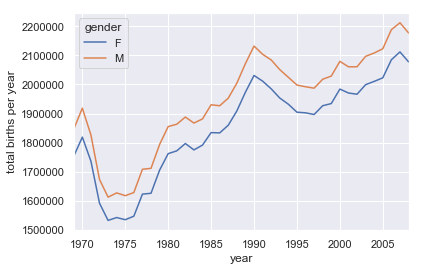

In [418]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

# further data exploring: cutting outliers

In [426]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

648.24

In [422]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [427]:
births['day'] = births['day'].astype(int)

In [430]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


Text(0, 0.5, 'mean births by day')

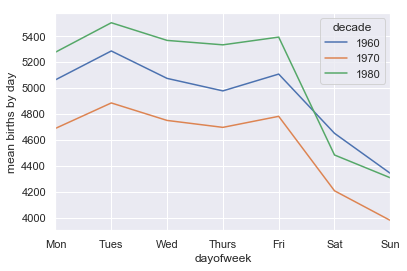

In [431]:
births.pivot_table('births', index='dayofweek',
                  columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [432]:
births_by_date = births.pivot_table('births', 
                                   [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

## make sure to account for leap years

In [433]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


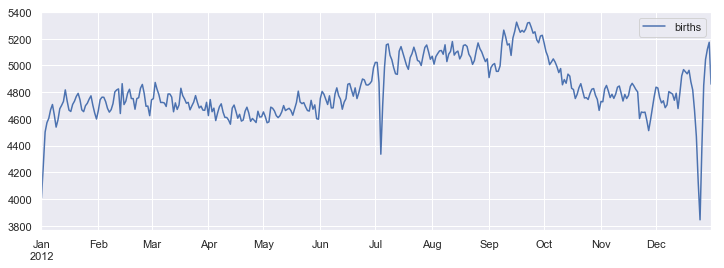

In [434]:
fig, ax = plt.subplots(figsize=(12,  4))
births_by_date.plot(ax=ax);

## we noticed that on national holidays there is a significant decrease in births (July 4, Chirstmas, New years)

# Vectorized string operations

In [435]:
x = np.array([2, 3, 5, 7, 11, 13])

In [436]:
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [437]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [439]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data] # breaks if there are any missing values

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [440]:
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [441]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [442]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [443]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [444]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [445]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [446]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [447]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [448]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [450]:
monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [451]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [452]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

## indicator variables

In [454]:
full_monte = pd.DataFrame({'name': monte,
                          'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
full_monte #A = Born in US # B = Born in UK C = Likes Cheese D = like ham

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [455]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [1]:
import numpy as np
import pandas as pd
https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz

In [15]:
!curl -O https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.3M  100 29.3M    0     0  2715k      0  0:00:11  0:00:11 --:--:-- 4269k
gunzip: recipeitems-latest.json: unknown suffix -- ignored


In [23]:
!gunzip 20170107-061401-recipeitems.json.gz

In [24]:
try:
    recipes = pd.read_json('20170107-061401-recipeitems.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [25]:
with open('20170107-061401-recipeitems.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [27]:
#read entire file into a Python array
with open('20170107-061401-recipeitems.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read result as a JSON
recipes = pd.read_json(data_json)

In [28]:
recipes.shape

(173278, 17)

In [29]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

# there's lots of information available, but it is VERY messy. time to clean it up

In [30]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [31]:
# the average ingredient list is almost 250 characters long, with the longest almost 9000 characters long

In [35]:
#longest
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [36]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [37]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [38]:
recipes.ingredients.str.contains('[Cc]inamon').sum() #check if a recipe misspells cinnamon

11

# building a recipe recommender

In [39]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

# then build a Boolean DataFrame consisting of True and False values indicating whether these spices appear in a recipe

In [40]:
import re
spice_df = pd.DataFrame(
    dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
         for spice in spice_list))
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [42]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

### only ten recipes use this combined result

In [43]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

In [44]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [48]:
from dateutil import parser
date = parser.parse("4th of july, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [49]:
date.strftime("%A")

'Saturday'

In [52]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [53]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [54]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [56]:
np.datetime64('2015-07-04 12:00') #automatically sets to your computer zone

numpy.datetime64('2015-07-04T12:00')

In [57]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

# Dates and times in Pandas

In [59]:
date = pd.to_datetime("4th of july, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [60]:
date.strftime('%A')

'Saturday'

In [61]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [62]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                         '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index )
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [63]:
data['2014-07-04':'2015-08-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [65]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [66]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [67]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of july, 2015',
                        '2015-jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [68]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [69]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [70]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range('2019-01-18', periods=12)

DatetimeIndex(['2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21',
               '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25',
               '2019-01-26', '2019-01-27', '2019-01-28', '2019-01-29'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.date_range('2019-01-18', periods=12, freq='H')

DatetimeIndex(['2019-01-18 00:00:00', '2019-01-18 01:00:00',
               '2019-01-18 02:00:00', '2019-01-18 03:00:00',
               '2019-01-18 04:00:00', '2019-01-18 05:00:00',
               '2019-01-18 06:00:00', '2019-01-18 07:00:00',
               '2019-01-18 08:00:00', '2019-01-18 09:00:00',
               '2019-01-18 10:00:00', '2019-01-18 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [74]:
pd.period_range('2019-01-18', periods=12, freq='M')

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', freq='M')

In [75]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### can modify the frequency of time

In [76]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [77]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# Example: Stock reader

In [79]:
from pandas_datareader import data

In [82]:
goog = data.DataReader('Goog', start='2004', end='2016',
                      data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [84]:
goog = goog['Close']

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()

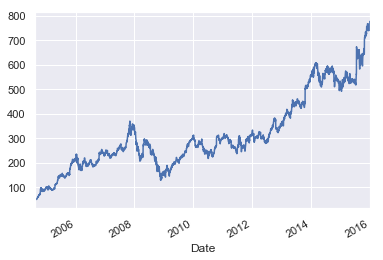

In [86]:
goog.plot();

# Resampling and converting frequencies

## resample() is essentially a data aggregation, whereas asfreq() is a data selection

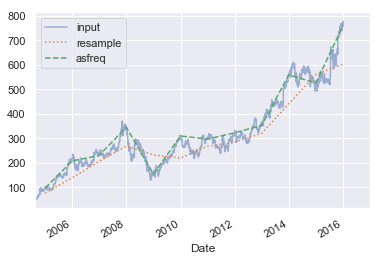

In [87]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
          loc='upper left');

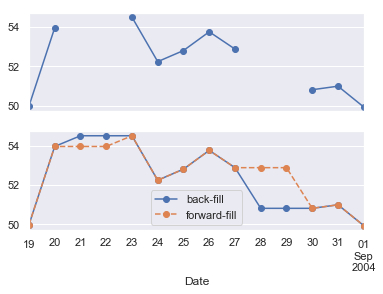

In [88]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

## time shifts
### shift() shifts data, whereas, tshift() shifts the index

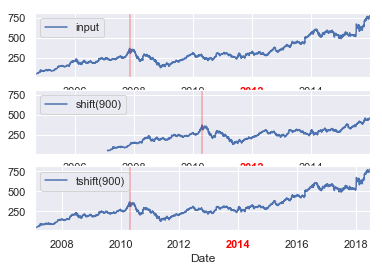

In [91]:
fig, ax = plt.subplots(3, sharey=True)
#apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

#legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[4].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

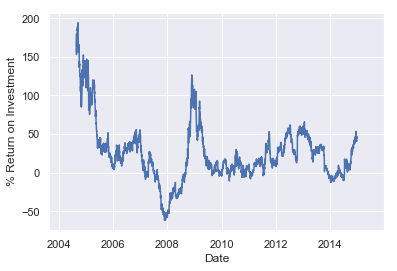

In [92]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

## rolling windows

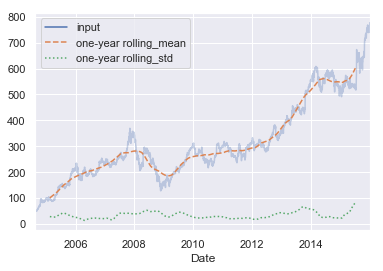

In [93]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

# Example: Visualizing Seattle Bicycle Counts

In [95]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1658k    0 1658k    0     0   387k      0 --:--:--  0:00:04 --:--:--  387k:--  0:00:01 --:--:--     0


In [96]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [97]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
data.dropna().describe()

,West,East,Total
count,59079.000000,59079.000000,59079.000000
mean,52.382539,59.590125,111.972664
std,67.631882,86.871875,141.984104
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,72.000000,146.000000
max,698.000000,850.000000,1097.000000


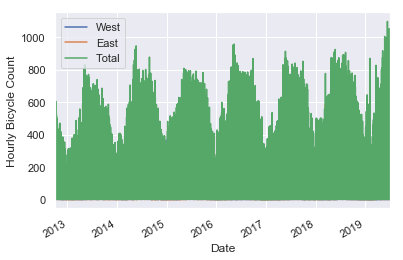

In [98]:
#matplotlib inline
seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0, 0.5, 'Weekly bicycle count')

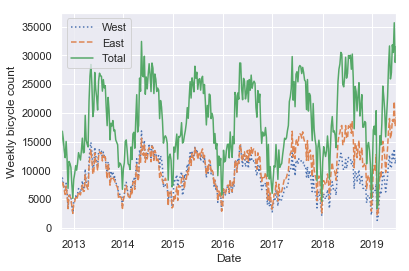

In [99]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

## gain even more insight using a 30 day rolling mean and centering the window

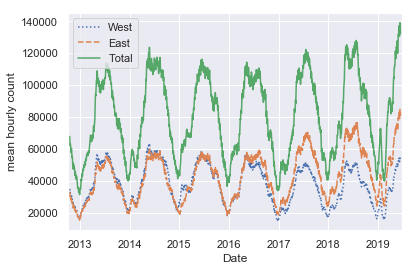

In [100]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

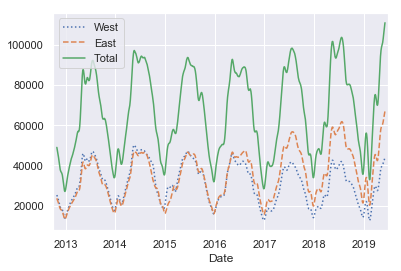

In [101]:
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

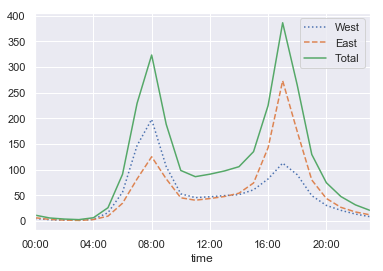

In [102]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

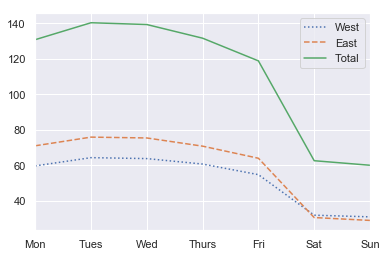

In [103]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [104]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


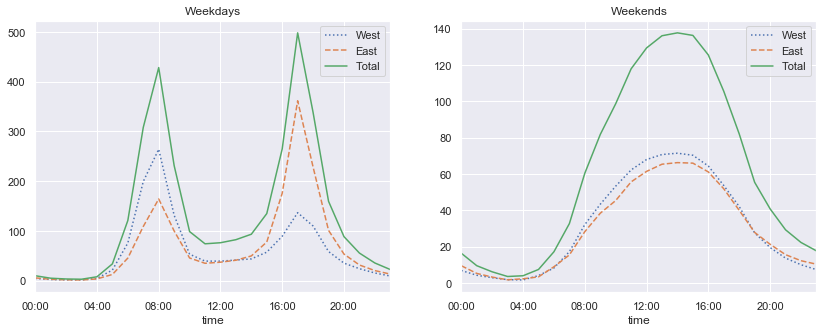

In [105]:
fix, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=[':', '--', '-'])

In [112]:
rng = np.random.RandomState(42)
x = rng.rand(int(1E6))
y = rng.rand(int(1E6))
%timeit x + y

896 µs ± 9.39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [115]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

322 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [116]:
mask = (x > 0.5) & (y < 0.5)

In [117]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [118]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

## pandas.eval() for Efficient Operations

In [119]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                     for i in range(4))

In [120]:
%timeit df1 + df2 + df3 + df4

58.9 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
%timeit pd.eval('df1 + df2 + df3 + df4')

31.3 ms ± 618 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [122]:
np.allclose(df1 + df2 + df3 + df4,
           pd.eval('df1 + df2 + df3 + df4'))

True

In [123]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

In [124]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

## pd.eval() supports all comparison operators

In [125]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [127]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [128]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [129]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

In [130]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [131]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [132]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

# DataFrame.eval() also allows assignment to any column

In [133]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [134]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [135]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


In [136]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

In [137]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [138]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True